In [2]:
from viewLatex import viewLatex

## Tamari lattice

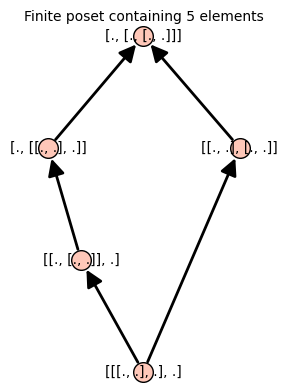

In [1]:
BT3 = list(BinaryTrees(3))
Tam3 = Poset((BT3, lambda x,y: x.tamari_lequal(y)))
Tam3

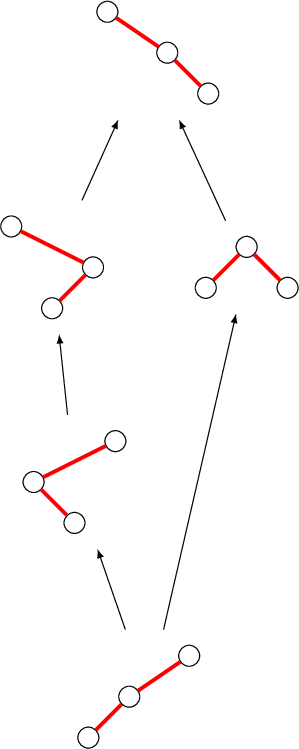

In [3]:
viewLatex(Tam3)

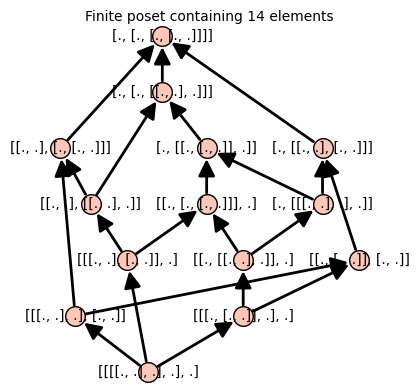

In [4]:
BT4 = list(BinaryTrees(4))
Tam4 = Poset((BT4, lambda x,y: x.tamari_lequal(y)))
Tam4

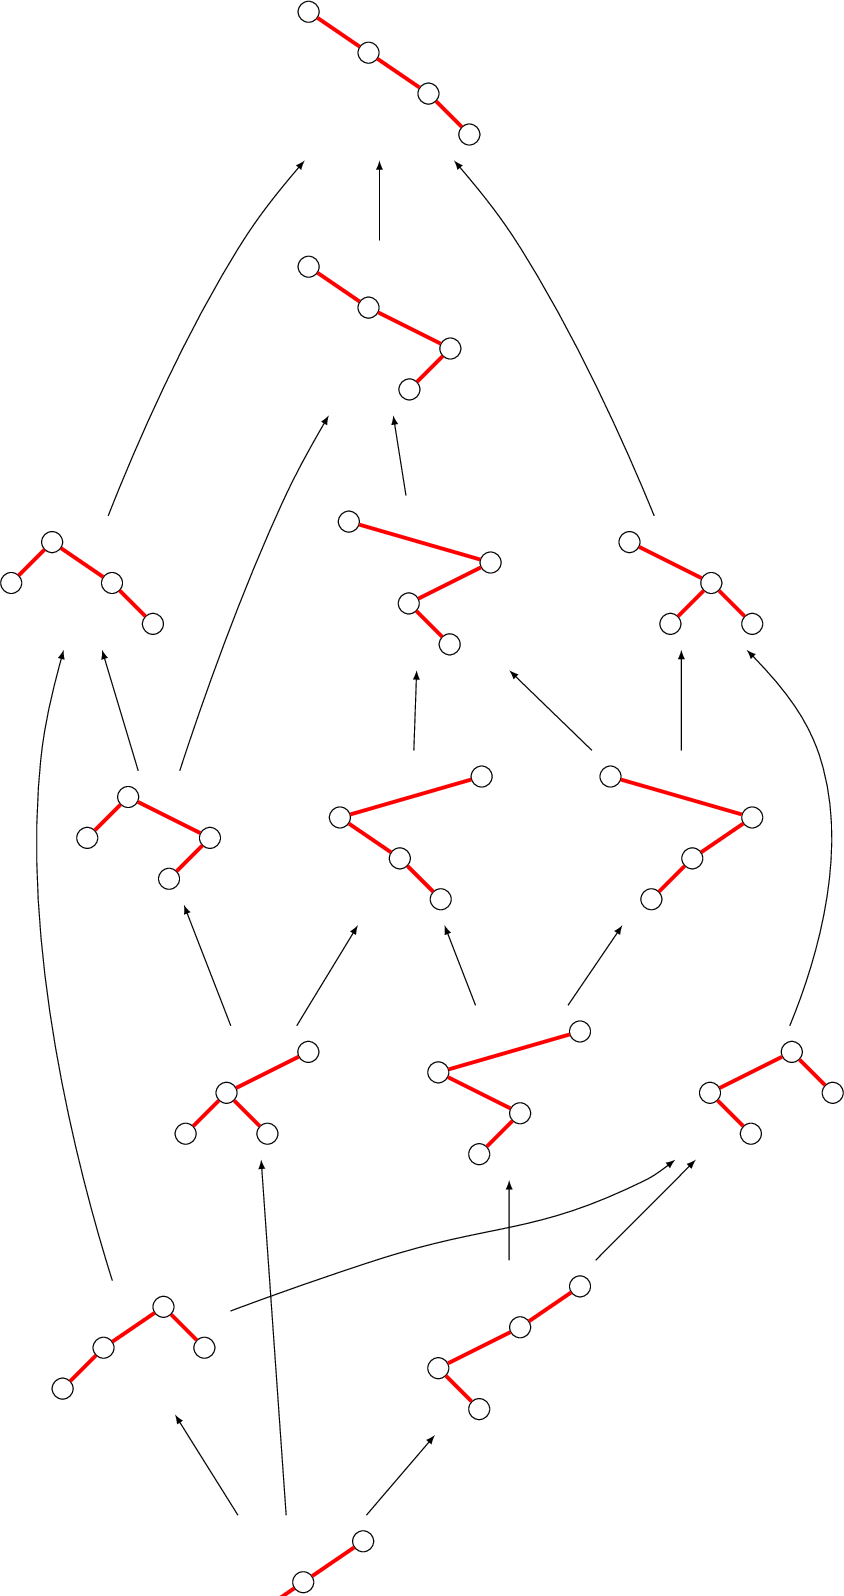

In [5]:
viewLatex(Tam4)

## As a sublattice

In [6]:
P4 = Permutations(4)
W4 = LatticePoset((P4, lambda x,y: x.permutohedron_lequal(y, side="right")))

In [15]:
Tam_perms = LatticePoset(([p for p in P4 if p.avoids([3,1,2])], lambda x,y: x.permutohedron_lequal(y, side="right")))

In [16]:
Tam_perms.is_sublattice(W4)

True

In [17]:
BT4 = list(BinaryTrees(4))
Tam4 = Poset((BT4, lambda x,y: x.tamari_lequal(y)))

In [18]:
Tam_perms.is_isomorphic(Tam4)

True

## Binary search tree

In [25]:
p = Permutation([1,3,5,2,4])

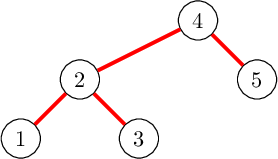

In [27]:
bt = p.binary_search_tree(false)
viewLatex(bt)

In [29]:
list(bt.to_poset().linear_extensions())

[[5, 3, 1, 2, 4],
 [5, 1, 3, 2, 4],
 [1, 5, 3, 2, 4],
 [1, 3, 5, 2, 4],
 [1, 3, 2, 5, 4],
 [3, 1, 2, 5, 4],
 [3, 1, 5, 2, 4],
 [3, 5, 1, 2, 4]]

## Loday's associahedron

In [19]:
def numberOfLeaves(bt):
    if bt.node_number() == 0:
        return 1
    return numberOfLeaves(bt[0]) + numberOfLeaves(bt[1])

def LodayCoordinatesGen(bt):
    if bt.node_number() == 0:
        return
    yield from LodayCoordinates(bt[0])
    yield numberOfLeaves(bt[0])*numberOfLeaves(bt[1])
    yield from LodayCoordinates(bt[1])

def LodayCoordinates(bt):
    return tuple(LodayCoordinatesGen(bt))

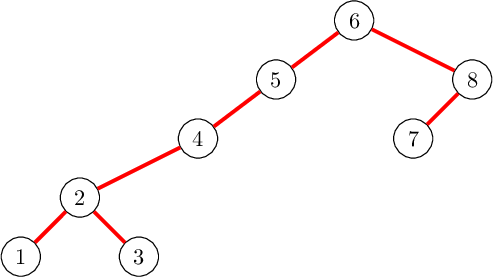

In [30]:
p = Permutation([1,3,2,4,5,7,8,6])
bt = p.binary_search_tree(false)
viewLatex(bt)

In [31]:
LodayCoordinates(bt)

(1, 4, 1, 4, 5, 18, 1, 2)

In [32]:
Asso3 = Polyhedron([LodayCoordinates(bt) for bt in BT3])
Asso3

A 2-dimensional polyhedron in ZZ^3 defined as the convex hull of 5 vertices (use the .plot() method to plot)

In [33]:
Asso3.plot()

Graphics3d Object

In [38]:
Asso4 = Polyhedron([LodayCoordinates(bt) for bt in BT4])
Asso4.plot(fill = false, frame = false)

Graphics3d Object

In [49]:
Perm3 =  Polyhedron(list(Permutations(3)))
Perm4 = Polyhedron(list(Permutations(4)))

In [53]:
Perm3.plot(frame = false, color = "blue") + Asso3.plot(frame = false, color = "red", alpha = .5)

Graphics3d Object

In [57]:
Perm4.plot(frame = false, color = "blue", alpha = .1) + Asso4.plot(frame = false, color = "red", alpha =.1) \
+ Perm4.plot(frame = false, color = "blue", fill = false) + Asso4.plot(frame = false, color = "red", fill = false)

Graphics3d Object